In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:

degre = 3

NBF=7
NB_COEFF = 31

max=1-1/(2**NBF)
min=1/(2**NBF)

upper_lim = max/min
lower_lim = 0

dots_to_evaluate = np.linspace(lower_lim,upper_lim,degre+1)

atan_values = np.atan(dots_to_evaluate)
matrix = np.vander(dots_to_evaluate, N=degre+1, increasing=True)

for ii in range(degre+1):
    matrix[:,ii] = dots_to_evaluate**ii

#Need to solve A*coeffs = b

coeffs = np.linalg.solve(matrix, atan_values)

print(f"coeff: {coeffs}")
print(f"min coeff res: {1/2**NB_COEFF }")
print(upper_lim)







coeff: [ 0.00000000e+00  6.67094030e-02 -8.54543115e-04  3.35569774e-06]
min coeff res: 4.656612873077393e-10
127.0


0.08208070861767738


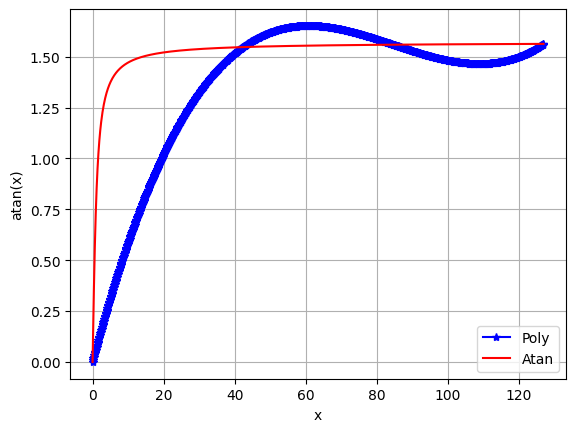

In [3]:
dots_to_plot =  np.linspace(lower_lim,upper_lim,1000)

value_poly = np.polyval(coeffs[::-1],dots_to_plot)
atan_to_plo = np.atan(dots_to_plot)

plt.plot(dots_to_plot, value_poly, label="Poly", color="blue", linestyle="-", marker="*")
plt.plot(dots_to_plot, atan_to_plo, label="Atan", color="red", linestyle="-")
 
# Add labels, title, and legend
plt.xlabel("x")
plt.ylabel("atan(x)")
plt.grid()
plt.legend()

error = np.abs(value_poly-atan_to_plo)

print(np.var(error))



Problema: se necesita un modulo que logre devolver el angulo de un complejo, en esta caso es I + jQ (QAM).
Soluciones:
- Lookup tables
- Polinomio de aproximacion 

### Atan() implementacion con polinomio de aproximacion
Para calcular el angulo del complejo se debe realizar el siguiente calculo:
alpha = atan(Q/I)
Por lo tanto el rango de este calculo va desde 0 (no se calcula, se checkea y devuelve un valor) hasta el numero mas grande que puede tomar Q y el mas chico que pueda tomar I.
El resultado de aplicar una aproximacion al rango completo es pobre, tenemos un rango de 0 a 10 que tiene un cambio brusco de valores y luego de 10 el valor de la funcion varia muy poco. Por lo tanto que se debe patir en dos polinomios




 comparision:
coeffs: [ 0.00000000e+00  1.08663477e+00 -2.79863347e-01 -8.26001881e-02
  8.05663682e-02 -2.37380470e-02  3.23200609e-03 -1.71658808e-04]
coeffs fxp: [ 0.00000000e+00  1.08663477e+00 -2.79863347e-01 -8.26001880e-02
  8.05663681e-02 -2.37380471e-02  3.23200598e-03 -1.71658583e-04]


error coeff : 0.018372608575807796

error aproximation : 3.534762050687828e-06

error fxp : 3.535461611078929e-06


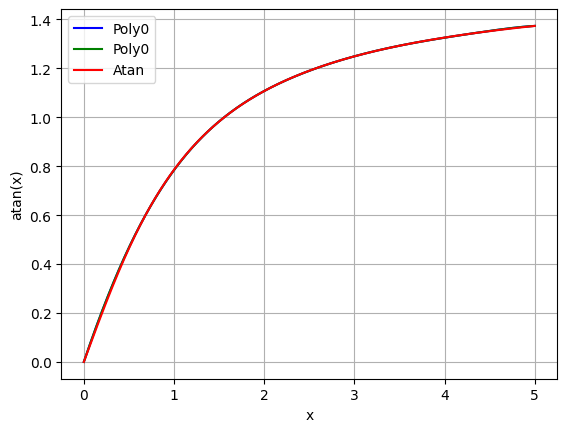

In [4]:
slice_num = 5

degre0 = 7
upper_lim0 = slice_num
lower_lim0 = 0

dots_to_evaluate0 = np.linspace(lower_lim0,upper_lim0,degre0+1)

atan_values0 = np.atan(dots_to_evaluate0)
matrix0 = np.vander(dots_to_evaluate0, N=degre0+1, increasing=True)

for ii in range(degre0+1):
    matrix0[:,ii] = dots_to_evaluate0**ii

#Need to solve A*coeffs = b

coeffs0 = np.linalg.solve(matrix0, atan_values0)
full_res_coeff0 = coeffs0*(2**NB_COEFF)
fixpoint_res_coeff0 = np.round(coeffs0*(2**NB_COEFF))
new_coeff_fixpoint = fixpoint_res_coeff0 / 2**NB_COEFF

error_coeff= np.abs(full_res_coeff0 - fixpoint_res_coeff0)

print(f"\n\n comparision:")

print(f"coeffs: {coeffs0}")
print(f"coeffs fxp: {new_coeff_fixpoint}")

print(f"\n\nerror coeff : {np.var(error_coeff)}")

dots_to_plot0 =  np.linspace(lower_lim0,upper_lim0,1000)

value_poly0= np.polyval(coeffs0[::-1],dots_to_plot0)
value_poly_fixpoint0 = np.polyval(new_coeff_fixpoint[::-1],dots_to_plot0)
atan_to_plo0 = np.atan(dots_to_plot0)

plt.plot(dots_to_plot0, value_poly0, label="Poly0", color="blue", linestyle="-")
plt.plot(dots_to_plot0, value_poly_fixpoint0, label="Poly0", color="green", linestyle="-")
plt.plot(dots_to_plot0, atan_to_plo0, label="Atan", color="red", linestyle="-")
 
# Add labels, title, and legend
plt.xlabel("x")
plt.ylabel("atan(x)")
plt.grid()
plt.legend()

error0 = np.abs(value_poly0-atan_to_plo0)
errorfxp = np.abs(value_poly_fixpoint0-atan_to_plo0)

print(f"\nerror aproximation : {np.var(error0)}")
print(f"\nerror fxp : {np.var(errorfxp)}")

# NEXT PART




 comparision:
coeffs: [ 1.29181679e+00  1.88035766e-02 -5.32757773e-04  7.31816735e-06
 -4.81769201e-08  1.21630082e-10]
coeffs fxp: [ 1.29181679e+00  1.88035765e-02 -5.32757957e-04  7.31833279e-06
 -4.79631126e-08  0.00000000e+00]


error coeff : 0.009431820784208017
error0 : 8.395462187016341e-05

error fxp : 1.0131847630514568


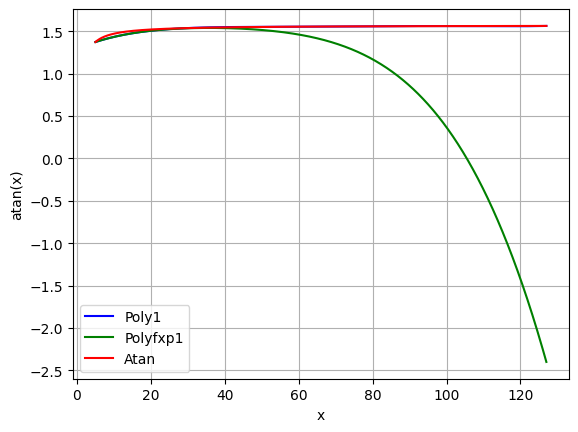

In [5]:
degre1 = 5
upper_lim1 = max/min
lower_lim1 = slice_num

dots_to_evaluate1 = np.linspace(lower_lim1,upper_lim1,degre1+1)

atan_values1 = np.atan(dots_to_evaluate1)
matrix1 = np.vander(dots_to_evaluate1, N=degre1+1, increasing=True)

for ii in range(degre1+1):
    matrix1[:,ii] = dots_to_evaluate1**ii

#Need to solve A*coeffs = b

coeffs1 = np.linalg.solve(matrix1, atan_values1)
full_res_coeff1 = coeffs1*(2**NB_COEFF)
fixpoint_res_coeff1 = np.round(coeffs1*(2**NB_COEFF))
new_coeff_fixpoint1 = fixpoint_res_coeff1 / 2**NB_COEFF

error_coeff1= np.abs(full_res_coeff1 - fixpoint_res_coeff1)

print(f"\n\n comparision:")

print(f"coeffs: {coeffs1}")
print(f"coeffs fxp: {new_coeff_fixpoint1}")

print(f"\n\nerror coeff : {np.var(error_coeff1)}")

dots_to_plot1 =  np.linspace(lower_lim1,upper_lim1,1000)

value_poly1 = np.polyval(coeffs1[::-1],dots_to_plot1)
value_poly_fixpoint1 = np.polyval(new_coeff_fixpoint1[::-1],dots_to_plot1)
atan_to_plo1 = np.atan(dots_to_plot1)

plt.plot(dots_to_plot1, value_poly1, label="Poly1", color="blue", linestyle="-")
plt.plot(dots_to_plot1, value_poly_fixpoint1, label="Polyfxp1", color="green", linestyle="-")
plt.plot(dots_to_plot1, atan_to_plo1, label="Atan", color="red", linestyle="-")
 
# Add labels, title, and legend
plt.xlabel("x")
plt.ylabel("atan(x)")
plt.grid()
plt.legend()

error1 = np.abs(value_poly1-atan_to_plo1)

print(f"error0 : {np.var(error1)}")
errorfxp = np.abs(value_poly_fixpoint1-atan_to_plo1)
print(f"\nerror fxp : {np.var(errorfxp)}")


la segunda parte no se resuelve bien

dividir en dos la segunda parte



 comparision:
coeffs: [ 1.05131423e+00  1.05555524e-01 -1.07802571e-02  5.87491161e-04
 -1.62972793e-05  1.80720775e-07]
coeffs fxp: [ 1.05131423e+00  1.05555524e-01 -1.07802572e-02  5.87491319e-04
 -1.62972137e-05  1.80676579e-07]


error coeff : 0.014113515566711435
error0 : 2.2919600241685992e-07

error fxp : 2.429002852643569e-07


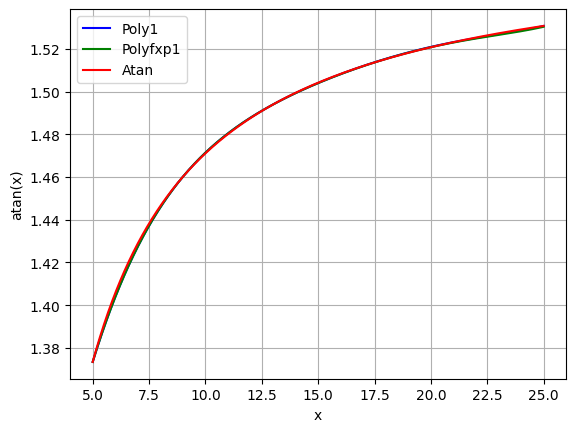

In [6]:
slice_num_2 = 25

degre1 = 5
upper_lim1 = slice_num_2
lower_lim1 = slice_num

dots_to_evaluate1 = np.linspace(lower_lim1,upper_lim1,degre1+1)

atan_values1 = np.atan(dots_to_evaluate1)
matrix1 = np.vander(dots_to_evaluate1, N=degre1+1, increasing=True)

for ii in range(degre1+1):
    matrix1[:,ii] = dots_to_evaluate1**ii

#Need to solve A*coeffs = b

coeffs1 = np.linalg.solve(matrix1, atan_values1)
full_res_coeff1 = coeffs1*(2**NB_COEFF)
fixpoint_res_coeff1 = np.round(coeffs1*(2**NB_COEFF))
new_coeff_fixpoint1 = fixpoint_res_coeff1 / 2**NB_COEFF

error_coeff1= np.abs(full_res_coeff1 - fixpoint_res_coeff1)

print(f"\n\n comparision:")

print(f"coeffs: {coeffs1}")
print(f"coeffs fxp: {new_coeff_fixpoint1}")

print(f"\n\nerror coeff : {np.var(error_coeff1)}")

dots_to_plot1 =  np.linspace(lower_lim1,upper_lim1,1000)

value_poly1 = np.polyval(coeffs1[::-1],dots_to_plot1)
value_poly_fixpoint1 = np.polyval(new_coeff_fixpoint1[::-1],dots_to_plot1)
atan_to_plo1 = np.atan(dots_to_plot1)

plt.plot(dots_to_plot1, value_poly1, label="Poly1", color="blue", linestyle="-")
plt.plot(dots_to_plot1, value_poly_fixpoint1, label="Polyfxp1", color="green", linestyle="-")
plt.plot(dots_to_plot1, atan_to_plo1, label="Atan", color="red", linestyle="-")
 
# Add labels, title, and legend
plt.xlabel("x")
plt.ylabel("atan(x)")
plt.grid()
plt.legend()

error1 = np.abs(value_poly1-atan_to_plo1)
errorfxp = np.abs(value_poly_fixpoint1-atan_to_plo1)

print(f"error0 : {np.var(error1)}")
print(f"\nerror fxp : {np.var(errorfxp)}")




 comparision:
coeffs: [ 1.49527825e+00  1.82146718e-03 -1.74288309e-05  5.73269305e-08]
coeffs fxp: [ 1.49527825e+00  1.82146719e-03 -1.74287707e-05  5.72763383e-08]


error coeff : 0.0025119163538251405
error0 : 3.3319348285564654e-07

error fxp : 3.2918613783940437e-07


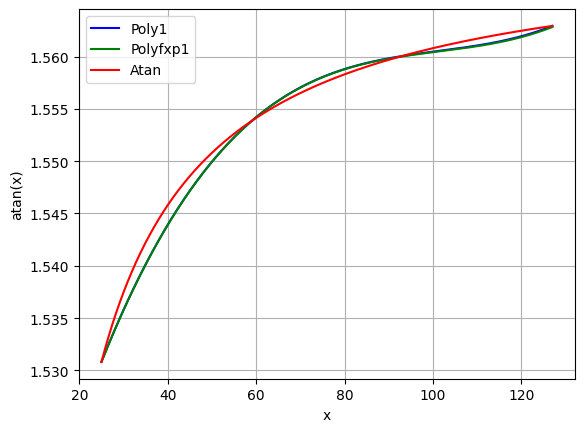

In [7]:
degre1 = 3
upper_lim1 = max/min
lower_lim1 = slice_num_2

dots_to_evaluate1 = np.linspace(lower_lim1,upper_lim1,degre1+1)

atan_values1 = np.atan(dots_to_evaluate1)
matrix1 = np.vander(dots_to_evaluate1, N=degre1+1, increasing=True)

for ii in range(degre1+1):
    matrix1[:,ii] = dots_to_evaluate1**ii

#Need to solve A*coeffs = b

coeffs1 = np.linalg.solve(matrix1, atan_values1)
full_res_coeff1 = coeffs1*(2**NB_COEFF)
fixpoint_res_coeff1 = np.round(coeffs1*(2**NB_COEFF))
new_coeff_fixpoint1 = fixpoint_res_coeff1 / 2**NB_COEFF

error_coeff1= np.abs(full_res_coeff1 - fixpoint_res_coeff1)

print(f"\n\n comparision:")

print(f"coeffs: {coeffs1}")
print(f"coeffs fxp: {new_coeff_fixpoint1}")

print(f"\n\nerror coeff : {np.var(error_coeff1)}")

dots_to_plot1 =  np.linspace(lower_lim1,upper_lim1,1000)

value_poly1 = np.polyval(coeffs1[::-1],dots_to_plot1)
value_poly_fixpoint1 = np.polyval(new_coeff_fixpoint1[::-1],dots_to_plot1)
atan_to_plo1 = np.atan(dots_to_plot1)

plt.plot(dots_to_plot1, value_poly1, label="Poly1", color="blue", linestyle="-")
plt.plot(dots_to_plot1, value_poly_fixpoint1, label="Polyfxp1", color="green", linestyle="-")
plt.plot(dots_to_plot1, atan_to_plo1, label="Atan", color="red", linestyle="-")
 
# Add labels, title, and legend
plt.xlabel("x")
plt.ylabel("atan(x)")
plt.grid()
plt.legend()

error1 = np.abs(value_poly1-atan_to_plo1)
errorfxp = np.abs(value_poly_fixpoint1-atan_to_plo1)

print(f"error0 : {np.var(error1)}")
print(f"\nerror fxp : {np.var(errorfxp)}")